In [24]:
# Can use histogram-type plots to review cluster or segment distribution of feature

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

name = '../../_Datasets/boston_marathon_2013.csv'

In [56]:
df = pd.read_csv(name)
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [58]:
print(df[df.city.isna()].index)
df.drop(10138, inplace=True)
df.drop(['ctz', 'state'], 1, inplace=True)

Int64Index([10138], dtype='int64')


In [59]:
for col in df.columns:
    if col in ['name', 'gender', 'country', 'city']:
        pass
    else:
        new_col = pd.to_numeric(df[col], errors='coerce')
        df.loc[new_col.index, col] = new_col

df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 1 to 16163
Data columns (total 19 columns):
25k          16000 non-null float64
age          16000 non-null int64
name         16000 non-null object
division     16000 non-null int64
10k          16000 non-null float64
gender       16000 non-null object
half         16000 non-null float64
official     16000 non-null float64
bib          16000 non-null float64
country      16000 non-null object
overall      16000 non-null int64
pace         16000 non-null float64
30k          16000 non-null float64
5k           16000 non-null float64
genderdiv    16000 non-null int64
20k          16000 non-null float64
35k          16000 non-null float64
city         16000 non-null object
40k          16000 non-null float64
dtypes: float64(11), int64(4), object(4)
memory usage: 2.4+ MB


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


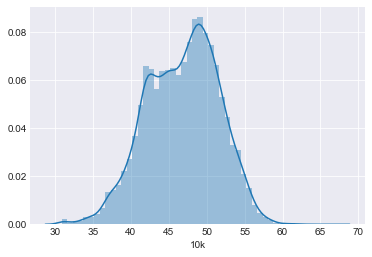

In [66]:
sns.distplot(df['10k'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


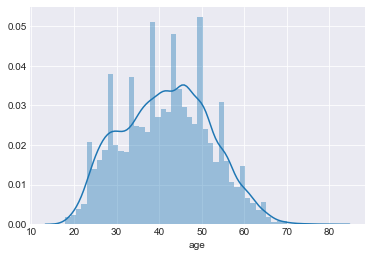

In [67]:
sns.distplot(df.age)

In [73]:
len(df.city.value_counts())

4376

In [72]:
len(df.country.value_counts())

68

In [75]:
df.country.value_counts()[:40]

USA    13051
CAN     1520
GBR      178
MEX      105
JPN      103
GER       86
BRA       80
ITA       76
AUS       73
FRA       63
SWE       48
ESP       47
DEN       45
NED       42
SUI       34
HKG       32
COL       29
IRL       28
SIN       22
AUT       21
VEN       21
NOR       21
KOR       19
CRC       19
ISL       15
CHI       15
RUS       14
POL       13
ARG       12
GUA       12
FIN       12
KEN       11
GRE       10
BEL       10
NZL       10
SVK        8
CHN        8
CZE        7
RSA        7
TWN        5
Name: country, dtype: int64

In [ ]:
from sklearn.cluster import MiniBatchKMeans